# `dtreeviz` - make tree visulization

# install `dtreeviz`

In [24]:
!pip install dtreeviz

# import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [27]:
import graphviz.backend as be
import dtreeviz
from IPython.display import Image, display_svg, SVG
import os

# Import datasets

In [28]:
X, y = load_iris(return_X_y=True)

# Data visulization

<Axes: >

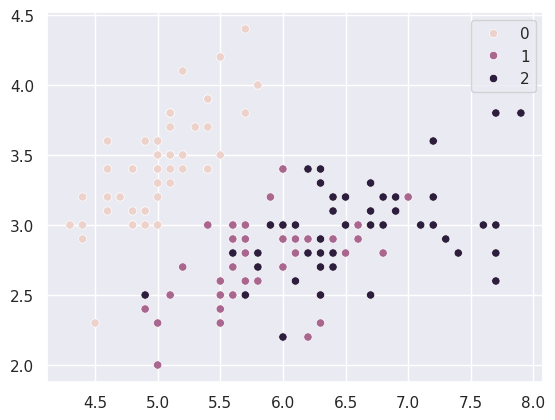

In [29]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_color_codes('deep')
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

# Train Test Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation

In [31]:
cls = DecisionTreeClassifier()
cls.fit(X_train, y_train)

DecisionTreeClassifier()

# Sklearn Traditional Tree Builder

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

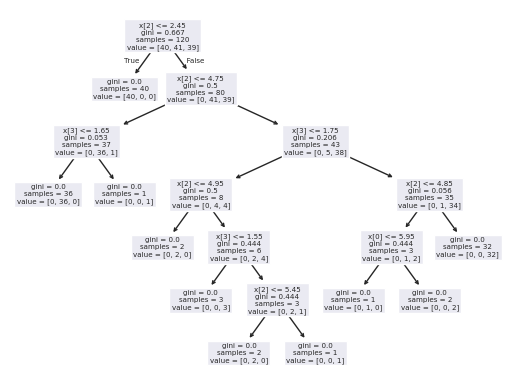

In [32]:
plot_tree(cls)

# Introduction to `dtreeviz`

# 1. Classification

In [33]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/iris-flower-dataset


In [34]:
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

In [35]:
clf_df = pd.read_csv(csv_file_path)
clf_df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
104,6.5,3.0,5.8,2.2,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor
65,6.7,3.1,4.4,1.4,Iris-versicolor


## Train Test Split

In [36]:
X = clf_df.drop('species', axis=1)
y = clf_df['species']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Train

In [38]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [39]:
feature_names = clf_df.drop(columns=['species']).columns.tolist()

In [40]:
viz_model1 = dtreeviz.model(
    cls,
    X_train,
    y_train,
    target_name='species',
    feature_names=feature_names,
    class_names=clf_df['species'].unique().tolist()
)

In [41]:
viz_model1

In [42]:
!pip install dtreeviz             # install dtreeviz for sklearn
!pip install dtreeviz[xgboost]    # install XGBoost related dependency
!pip install dtreeviz[pyspark]    # install pyspark related dependency
!pip install dtreeviz[lightgbm]   # install LightGBM related dependency
!pip install dtreeviz[tensorflow_decision_forests]   # install tensorflow_decision_forests related dependency
!pip install dtreeviz[all]        # install all related dependencies

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import dtreeviz

iris = load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

viz_model = dtreeviz.model(clf,
                           X_train=X, y_train=y,
                           feature_names=iris.feature_names,
                           target_name='iris',
                           class_names=iris.target_names)

v = viz_model.view()     # render as SVG into internal object
v.show()                 # pop up window
v.save("/tmp/iris.svg")  # optionally save as svg

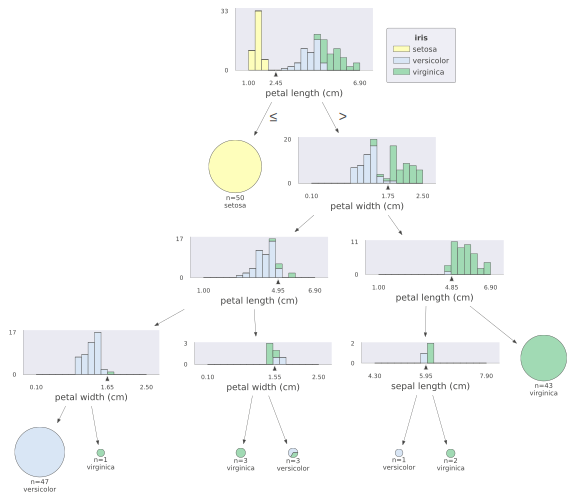

In [44]:
viz_model.view()       # in notebook, displays inline